## **Importando Bibliotecas**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

## **Importando a Base de Dados**

In [6]:
base_dados = pd.read_excel("Data Model - Pizza Sales.xlsx")
base_dados.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## **Analisando a Base de Dados**

### **Verificando Duplicação**

In [49]:
base_dados.duplicated().sum()

0

### **Colunas**

In [9]:
base_dados.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

###  **Linhas e Colunas (quantidade)**

In [10]:
base_dados.shape

(48620, 12)

### **Células Nulas**

In [5]:
base_dados.isnull().sum().sum()

0

## **Faturamento Total**

In [46]:
faturamento_total = base_dados["total_price"].sum()
print(f"Faturamento Total: USD {faturamento_total:.2f}")

Faturamento Total: USD 817860.05


## **Tipos de Pizza (quantidade)**

In [18]:
tipos_pizza = base_dados["pizza_name"].nunique()
print(f"Tipos de pizza: {tipos_pizza}")

Tipos de pizza: 32


## **Número Total de Pedidos**

In [15]:
pedidos_total = base_dados["quantity"].sum()
print(f"Total de Pedidos: {pedidos_total}")

Total de Pedidos: 49574


## **Preço Total por Pedido**

In [24]:
preco_pedido = base_dados[['order_id','total_price']].groupby('order_id').sum().sort_values(by='total_price',ascending=False)
display(preco_pedido)

,total_price
order_id,
18845,444.20
10760,417.15
1096,285.15
6169,284.00
740,280.95
...,...
17455,9.75
17456,9.75
20492,9.75


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



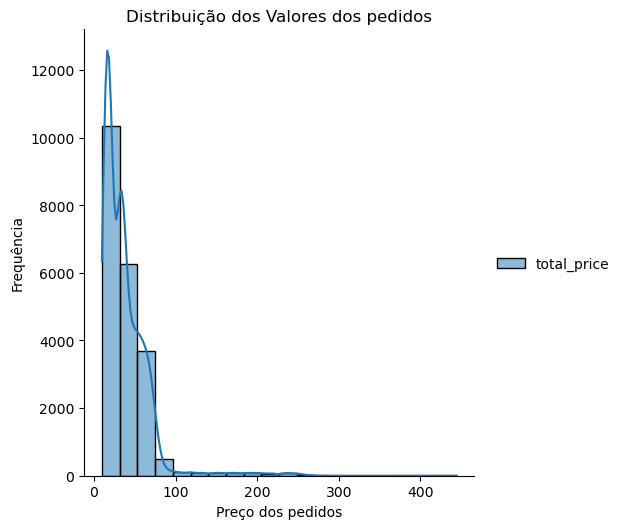

In [25]:
#divide o conjunto de dados em intervalos de valores e conta quantos valores 'caem' em cada intervalo
sns.displot(preco_pedido, bins=20, legend = True, kde = True)
plt.title('Distribuição dos Valores dos pedidos')
plt.xlabel('Preço dos pedidos')
plt.ylabel('Frequência')
plt.show('plt.png')

## **Preço Médio por Pedido**

In [45]:
preco_medio = base_dados['total_price'].mean()
print(f'Preço Médio: USD {preco_medio:.2f}')

Preço Médio: USD 16.82


## **Produto Mais Vendido e Menos Vendido**

In [14]:
print(f"A pizza mais vendida foi: {base_dados.pizza_name.value_counts().nlargest(1)}" "\n")

A pizza mais vendida foi: pizza_name
The Classic Deluxe Pizza    2416
Name: count, dtype: int64



In [17]:
print(f"A pizza menos vendia foi: {base_dados.pizza_name.value_counts().nsmallest(1)}""\n")

A pizza menos vendia foi: pizza_name
The Brie Carre Pizza    480
Name: count, dtype: int64



## **Faturamento Total por Pedido**

In [7]:
preco_total_pedido = base_dados[["pizza_name", "total_price"]].groupby("pizza_name").sum().sort_values(by="total_price",ascending=False)
display(preco_total_pedido)

,total_price
pizza_name,
The Thai Chicken Pizza,43434.25
The Barbecue Chicken Pizza,42768.00
The California Chicken Pizza,41409.50
The Classic Deluxe Pizza,38180.50
The Spicy Italian Pizza,34831.25
The Southwest Chicken Pizza,34705.75
The Italian Supreme Pizza,33476.75
The Hawaiian Pizza,32273.25
The Four Cheese Pizza,32265.70


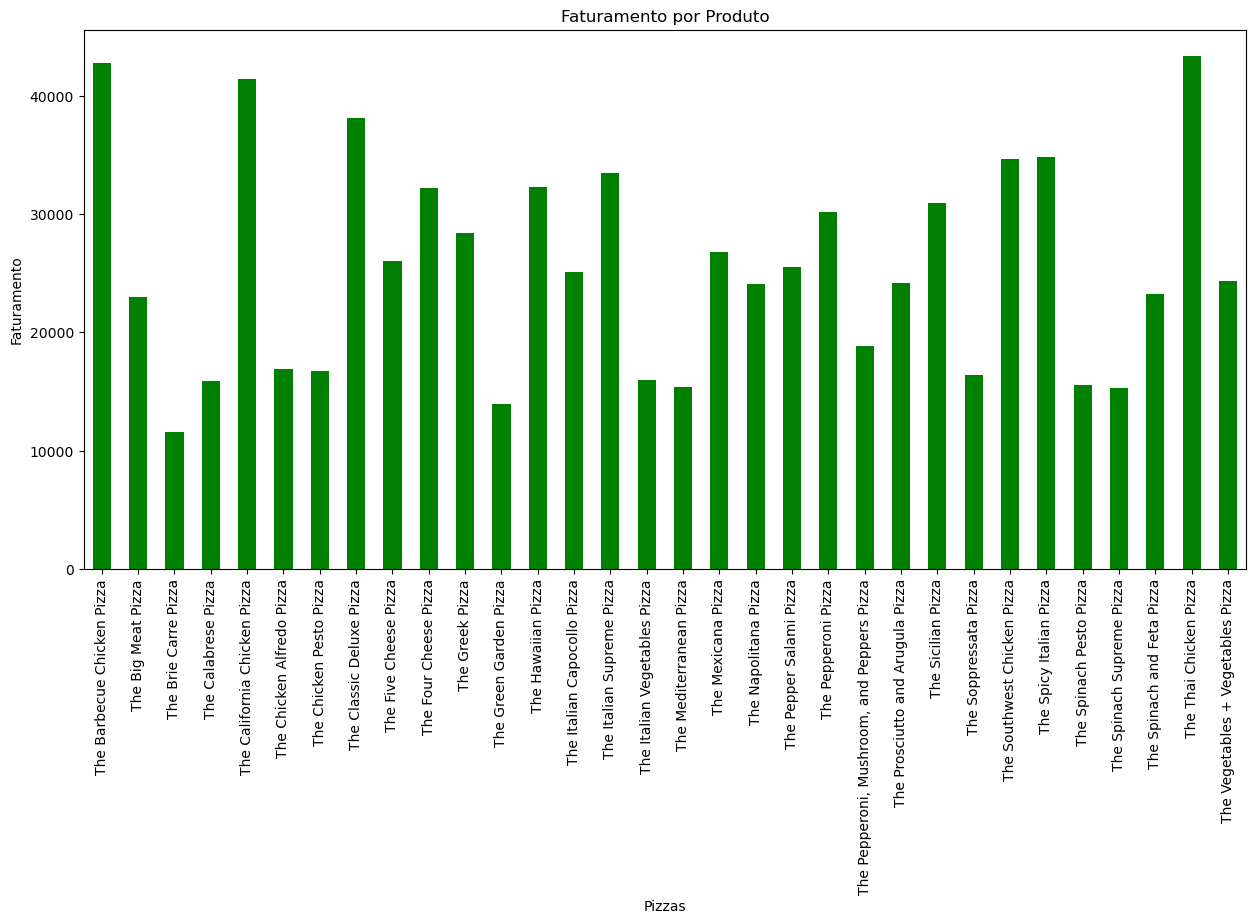

In [10]:
preco_total_pedido.groupby('pizza_name').sum().plot(kind='bar',figsize=(15,7),legend=False,color='green')
plt.ylabel('Faturamento')
plt.xlabel('Pizzas')
plt.title('Faturamento por Produto')
plt.show('plt.png')

## **Tamanho de Pizza Mais Pedido**

In [12]:
tamanho_mais_vendido = base_dados[["pizza_size", "quantity"]].groupby(["pizza_size"]).sum()
display(tamanho_mais_vendido)

,quantity
pizza_size,
L,18956
M,15635
S,14403
XL,552
XXL,28


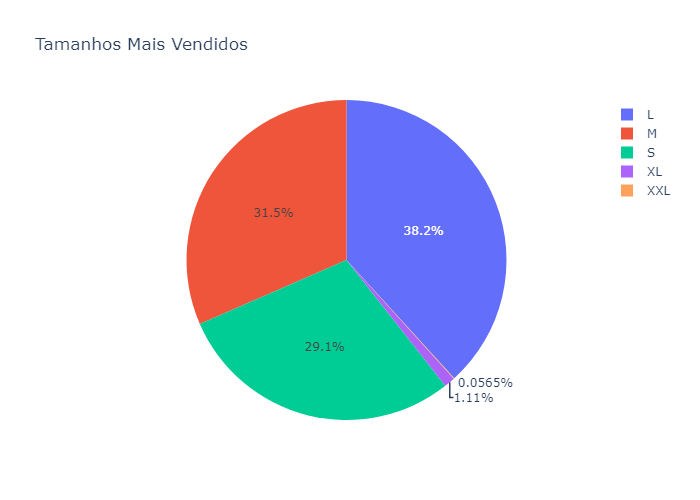

In [15]:
labels = tamanho_mais_vendido.index
values = tamanho_mais_vendido["quantity"]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)],layout_title_text="Tamanhos Mais Vendidos")
fig.show(renderer="png")

## **Categoria de Pizza Mais Pedida**

In [17]:
categoria_mp = base_dados[["pizza_category","quantity"]].groupby("pizza_category").sum().sort_values(by="quantity",ascending=False)
display(categoria_mp)

,quantity
pizza_category,
Classic,14888
Supreme,11987
Veggie,11649
Chicken,11050


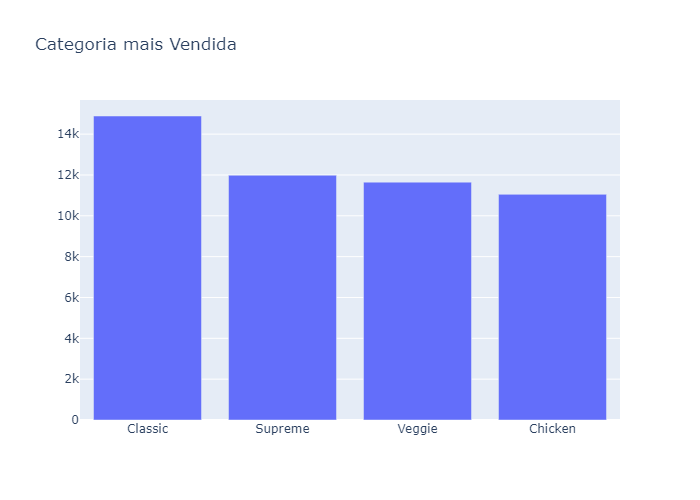

In [18]:
labels = categoria_mp.index
values = categoria_mp["quantity"]
fig = go.Figure(data=[go.Bar(x=labels,y=values)],layout_title_text="Categoria mais Vendida")
fig.show(renderer="png")

## **Número de Pedidos por Dia**

In [19]:
dia_mv = base_dados[["order_date","quantity"]].groupby("order_date").sum().sort_values(by="quantity",ascending=False) #dias com mais vendas
display(dia_mv)

,quantity
order_date,
2015-11-26,266
2015-11-27,264
2015-10-15,262
2015-07-04,234
2015-07-03,213
...,...
2015-12-27,89
2015-11-22,84
2015-12-30,82


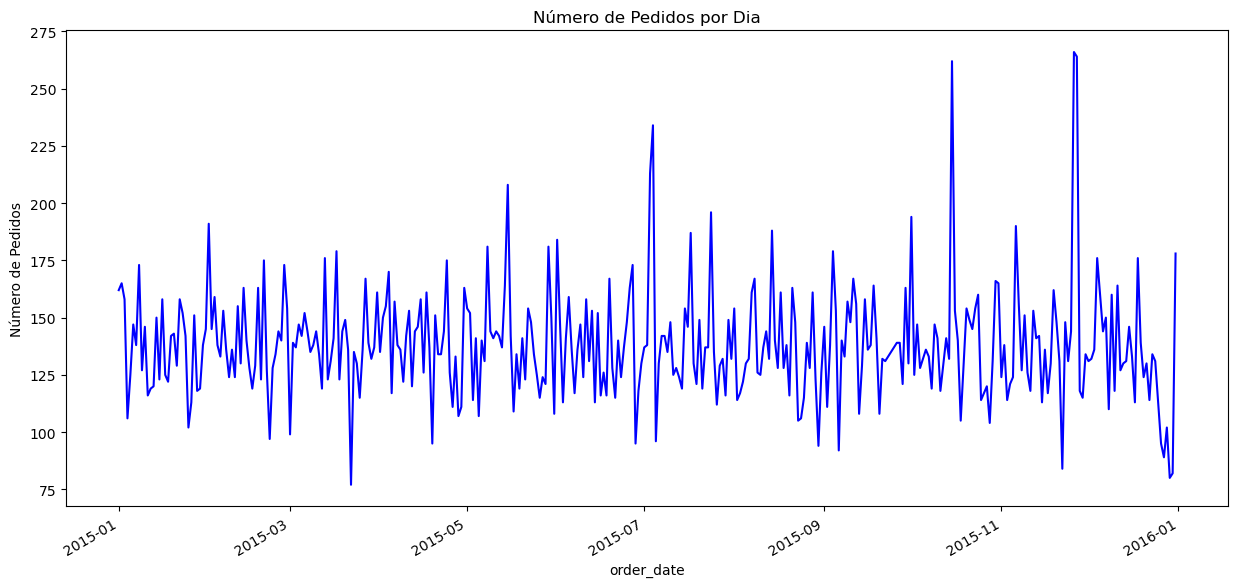

In [20]:
dia_mv.groupby("order_date").sum().plot(kind='line', figsize=(15,7),legend=False,color="Blue")
plt.title("Número de Pedidos por Dia")
plt.ylabel('Número de Pedidos')
plt.show("plt.png")

## **Faturamento Obtido por Dia**

In [72]:
faturamento_dia = base_dados[["order_date","total_price"]].groupby("order_date").sum().sort_values(by="total_price",ascending=False)
display(faturamento_dia)

,total_price
order_date,
2015-11-27,4422.45
2015-11-26,4405.95
2015-10-15,4320.20
2015-07-04,3864.20
2015-07-03,3443.00
...,...
2015-12-27,1419.00
2015-11-22,1368.70
2015-12-29,1353.25


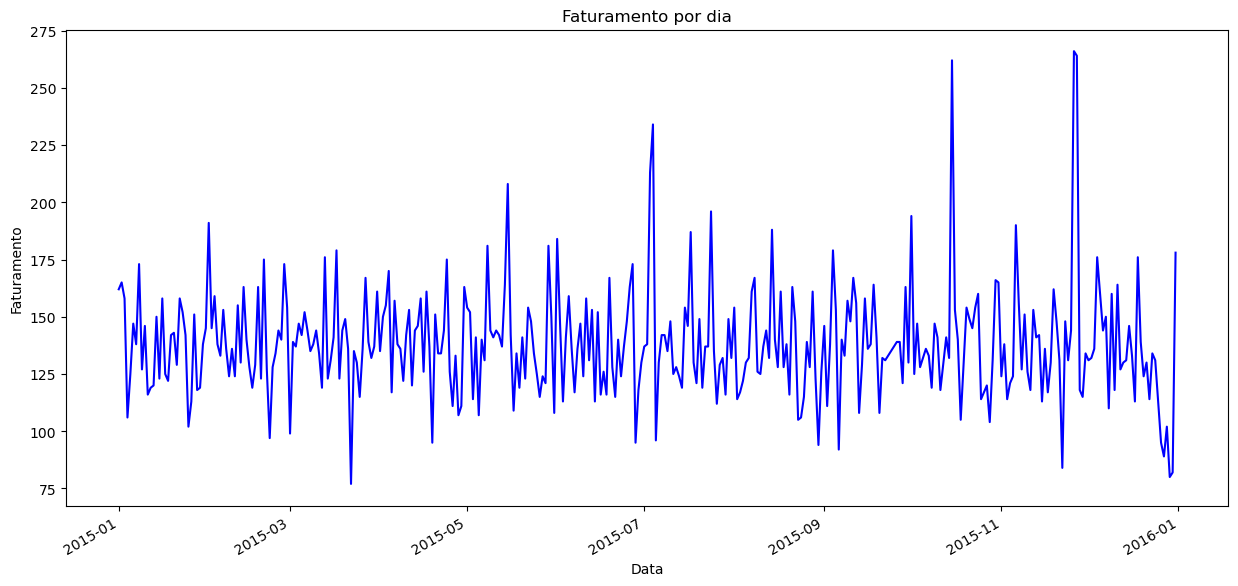

In [22]:
dia_mv.groupby('order_date').sum().plot(kind = 'line', figsize=(15,7), legend=False, color="blue")
plt.ylabel('Faturamento')
plt.xlabel('Data')
plt.title('Faturamento por dia')
plt.show('plt.png')